## To DO
1. new features: 5 minute aggregates of the past hour, five minutes trends and volatility and other technical analysis, 1 day, 3 day 7 day trends and technical markers
2. timeseries cross-validation
3. Hyper-prameter tuning
4. train on single company or multiple? 

### v1 create features: 
1. prev hour open high low close
2. delta t-1, t-2 in open high low close
3. avg(last 3 open high low close)
4. dif high-low 
5. mean/std dif high-low over the past 3/7 days
6. ratio dif high-low last 3 hours to past few x days8.
8. HR of day
9. Day of week

### v2 features
1. trend over the past 3 hours, day, 3 days, 4 days



### v3
next stage asset type category, e.g. china, tech, pharma, etc, and trends in asset subtype 


In [24]:
from datetime import timedelta
from tqdm.notebook import tqdm
import time
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
import pandas as pd
import ta
import pickle

In [269]:
bars_df=pd.read_csv('data/bars_hourly_20200101_GGL_NVD_MS_APL.csv')
bars_df['delta_HL']=bars_df["high"]-bars_df["low"]

#bars_df['timestamp']=pd.to_datetime(bars_df.timestamp, errors='coerce')

# Test

In [270]:
#bars_df['timestamp']=pd.to_datetime(bars_df.timestamp, errors='coerce')
bars_df_symbol=bars_df[bars_df['symbol']=='AAPL']
bars_df_symbol=bars_df_symbol.sort_values(by='timestamp')


# feature engineering

In [462]:
symbols=bars_df.symbol.unique()

feature_columns=['last_value_open','last_value_high','last_value_low','last_value_close','last_value_volume','last_value_trade_count','last_value_vwap','last_value_delta_HL','diff_last_open','diff_last_high','diff_last_low','diff_last_close','diff_last_volume','diff_last_trade_count','diff_last_vwap','diff_last_delta_HL','mean_last_3b_open','mean_last_3b_high','mean_last_3b_low','mean_last_3b_close','mean_last_3b_volume','mean_last_3b_trade_count','mean_last_3b_vwap','mean_last_3b_delta_HL','std_last_3b_open','std_last_3b_high','std_last_3b_low','std_last_3b_close','std_last_3b_volume','std_last_3b_trade_count','std_last_3b_vwap','std_last_3b_delta_HL','mean_last_16b_open','mean_last_16b_high','mean_last_16b_low','mean_last_16b_close','mean_last_16b_volume','mean_last_16b_trade_count','mean_last_16b_vwap','mean_last_16b_delta_HL','std_last_16b_open','std_last_16b_high','std_last_16b_low','std_last_16b_close','std_last_16b_volume','std_last_16b_trade_count','std_last_16b_vwap','std_last_16b_delta_HL','mean_last_48b_open','mean_last_48b_high','mean_last_48b_low','mean_last_48b_close','mean_last_48b_volume','mean_last_48b_trade_count','mean_last_48b_vwap','mean_last_48b_delta_HL','std_last_48b_open','std_last_48b_high','std_last_48b_low','std_last_48b_close','std_last_48b_volume','std_last_48b_trade_count','std_last_48b_vwap','std_last_48b_delta_HL','mean_last_100b_open','mean_last_100b_high','mean_last_100b_low','mean_last_100b_close','mean_last_100b_volume','mean_last_100b_trade_count','mean_last_100b_vwap','mean_last_100b_delta_HL','std_last_100b_open','std_last_100b_high','std_last_100b_low','std_last_100b_close','std_last_100b_volume','std_last_100b_trade_count','std_last_100b_vwap','std_last_100b_delta_HL','ratio_last_mean_past3_open','ratio_last_mean_past3_high','ratio_last_mean_past3_low','ratio_last_mean_past3_close','ratio_last_mean_past3_volume','ratio_last_mean_past3_trade_count','ratio_last_mean_past3_vwap','ratio_last_mean_past3_delta_HL','ratio_last_std_past3_open','ratio_last_std_past3_high','ratio_last_std_past3_low','ratio_last_std_past3_close','ratio_last_std_past3_volume','ratio_last_std_past3_trade_count','ratio_last_std_past3_vwap','ratio_last_std_past3_delta_HL','ratio_last_mean_past16_open','ratio_last_mean_past16_high','ratio_last_mean_past16_low','ratio_last_mean_past16_close','ratio_last_mean_past16_volume','ratio_last_mean_past16_trade_count','ratio_last_mean_past16_vwap','ratio_last_mean_past16_delta_HL','ratio_last_std_past16_open','ratio_last_std_past16_high','ratio_last_std_past16_low','ratio_last_std_past16_close','ratio_last_std_past16_volume','ratio_last_std_past16_trade_count','ratio_last_std_past16_vwap','ratio_last_std_past16_delta_HL','ratio_last_mean_past48_open','ratio_last_mean_past48_high','ratio_last_mean_past48_low','ratio_last_mean_past48_close','ratio_last_mean_past48_volume','ratio_last_mean_past48_trade_count','ratio_last_mean_past48_vwap','ratio_last_mean_past48_delta_HL','ratio_last_std_past48_open','ratio_last_std_past48_high','ratio_last_std_past48_low','ratio_last_std_past48_close','ratio_last_std_past48_volume','ratio_last_std_past48_trade_count','ratio_last_std_past48_vwap','ratio_last_std_past48_delta_HL','ratio_past3_mean_past16_open','ratio_past3_mean_past16_high','ratio_past3_mean_past16_low','ratio_past3_mean_past16_close','ratio_past3_mean_past16_volume','ratio_past3_mean_past16_trade_count','ratio_past3_mean_past16_vwap','ratio_past3_mean_past16_delta_HL','ratio_past3_std_past16_open','ratio_past3_std_past16_high','ratio_past3_std_past16_low','ratio_past3_std_past16_close','ratio_past3_std_past16_volume','ratio_past3_std_past16_trade_count','ratio_past3_std_past16_vwap','ratio_past3_std_past16_delta_HL','ratio_past16_mean_past48_open','ratio_past16_mean_past48_high','ratio_past16_mean_past48_low','ratio_past16_mean_past48_close','ratio_past16_mean_past48_volume','ratio_past16_mean_past48_trade_count','ratio_past16_mean_past48_vwap','ratio_past16_mean_past48_delta_HL','ratio_past16_std_past48_open','ratio_past16_std_past48_high','ratio_past16_std_past48_low','ratio_past16_std_past48_close','ratio_past16_std_past48_volume','ratio_past16_std_past48_trade_count','ratio_past16_std_past48_vwap','ratio_past16_std_past48_delta_HL','ratio_past48_mean_past100_open','ratio_past48_mean_past100_high','ratio_past48_mean_past100_low','ratio_past48_mean_past100_close','ratio_past48_mean_past100_volume','ratio_past48_mean_past100_trade_count','ratio_past48_mean_past100_vwap','ratio_past48_mean_past100_delta_HL','ratio_past48_std_past100_open','ratio_past48_std_past100_high','ratio_past48_std_past100_low','ratio_past48_std_past100_close','ratio_past48_std_past100_volume','ratio_past48_std_past100_trade_count','ratio_past48_std_past100_vwap','ratio_past48_std_past100_delta_HL','zscore_last_past3_open','zscore_last_past3_high','zscore_last_past3_low','zscore_last_past3_close','zscore_last_past3_volume','zscore_last_past3_trade_count','zscore_last_past3_vwap','zscore_last_past3_delta_HL','zscore_last_past16_open','zscore_last_past16_high','zscore_last_past16_low','zscore_last_past16_close','zscore_last_past16_volume','zscore_last_past16_trade_count','zscore_last_past16_vwap','zscore_last_past16_delta_HL','zscore_last_past48_open','zscore_last_past48_high','zscore_last_past48_low','zscore_last_past48_close','zscore_last_past48_volume','zscore_last_past48_trade_count','zscore_last_past48_vwap','zscore_last_past48_delta_HL','zscore_last_past100_open','zscore_last_past100_high','zscore_last_past100_low','zscore_last_past100_close','zscore_last_past100_volume','zscore_last_past100_trade_count','zscore_last_past100_vwap','zscore_last_past100_delta_HL','zscore_pas3_past16_open','zscore_pas3_past16_high','zscore_pas3_past16_low','zscore_pas3_past16_close','zscore_pas3_past16_volume','zscore_pas3_past16_trade_count','zscore_pas3_past16_vwap','zscore_pas3_past16_delta_HL','zscore_past3_past48_open','zscore_past3_past48_high','zscore_past3_past48_low','zscore_past3_past48_close','zscore_past3_past48_volume','zscore_past3_past48_trade_count','zscore_past3_past48_vwap','zscore_past3_past48_delta_HL','zscore_past3_past100_open','zscore_past3_past100_high','zscore_past3_past100_low','zscore_past3_past100_close','zscore_past3_past100_volume','zscore_past3_past100_trade_count','zscore_past3_past100_vwap','zscore_past3_past100_delta_HL']
features_df_all=pd.DataFrame()
cols=["open","high","low", "close","volume","trade_count","vwap","delta_HL"]
#symbols=['AAPL']

for symbol in symbols:
    print(symbol)
    bars_df_symbol=bars_df[bars_df['symbol']==symbol]
    bars_df_symbol.sort_values(by='timestamp')
    
    f0=bars_df_symbol[cols].rolling(window=5,closed='left').mean().rename(columns={col:'sma_5L_'+col for col in cols})
    f00=bars_df_symbol[cols].ewm(span=period, adjust=False).mean().rename(columns={col:'ewm_5L_'+col for col in cols}).rolling(window=1, closed='left').apply(lambda x:x.iloc[0])
    
    #simple historical stats
    f1=bars_df_symbol[cols].rolling(window=2, closed='left').apply(lambda x:x.iloc[1]-x.iloc[0]).rename(columns={col:'diff_2L_'+col for col in cols})/f0.values
    f2=bars_df_symbol[cols].rolling(window=1, closed='left').apply(lambda x:x.iloc[0]).rename(columns={col:'last_value_'+col for col in cols})
    f2_2=f2.rename(columns={key:'last_value_nrmlz_'+value for key,value in zip(f2.columns,cols)})/f0.values

    f3=bars_df_symbol[cols].rolling(window=3, closed='left').mean().rename(columns={col:'sma_3L_'+col for col in cols})/f0.values
    f4=bars_df_symbol[cols].rolling(window=5, closed='left').mean().rename(columns={col:'sma_5L_'+col for col in cols})/f0.values
    f5=bars_df_symbol[cols].rolling(window=10,closed='left').mean().rename(columns={col:'sma_10L_'+col for col in cols})/f0.values
    f6=bars_df_symbol[cols].rolling(window=20,closed='left').mean().rename(columns={col:'sma_20L_'+col for col in cols})/f0.values
    f7=bars_df_symbol[cols].rolling(window=40,closed='left').mean().rename(columns={col:'sma_40L_'+col for col in cols})/f0.values
    f8=bars_df_symbol[cols].rolling(window=80,closed='left').mean().rename(columns={col:'sma_80L_'+col for col in cols})/f0.values
        
    f9=bars_df_symbol[cols].rolling(window=3,  closed='left').std().rename(columns={col:'std_3L_'+col for col in cols})/f0.values
    f10=bars_df_symbol[cols].rolling(window=5, closed='left').std().rename(columns={col:'std_5L_'+col for col in cols})/f0.values
    f11=bars_df_symbol[cols].rolling(window=10,closed='left').std().rename(columns={col:'std_10L_'+col for col in cols})/f0.values
    f12=bars_df_symbol[cols].rolling(window=20,closed='left').std().rename(columns={col:'std_20L_'+col for col in cols})/f0.values
    f13=bars_df_symbol[cols].rolling(window=40,closed='left').std().rename(columns={col:'std_40L_'+col for col in cols})/f0.values
    f14=bars_df_symbol[cols].rolling(window=80,closed='left').std().rename(columns={col:'std_80L_'+col for col in cols})/f0.values

    #ratios
    f15=(f2/f3.values).rename(columns={key:'ratio_last_mean3L_'+val for key,val in zip(f2.columns,cols)})
    f16=(f2/f4.values).rename(columns={key:'ratio_last_mean5L_'+val for key,val in zip(f2.columns,cols)})
    f17=(f2/f5.values).rename(columns={key:'ratio_last_mean10L_'+val for key,val in zip(f2.columns,cols)})
    f18=(f2/f6.values).rename(columns={key:'ratio_last_mean20L_'+val for key,val in zip(f2.columns,cols)})
    f19=(f2/f7.values).rename(columns={key:'ratio_last_mean40L_'+val for key,val in zip(f2.columns,cols)})
    f20=(f2/f8.values).rename(columns={key:'ratio_last_mean80L_'+val for key,val in zip(f2.columns,cols)})

    f21=(f2/f9.values).rename( columns={key:'ratio_last_std3L_'+val for key,val in zip(f2.columns,cols)})
    f22=(f2/f10.values).rename(columns={key:'ratio_last_std5L_'+val for key,val in zip(f2.columns,cols)})
    f23=(f2/f11.values).rename(columns={key:'ratio_last_std10L_'+val for key,val in zip(f2.columns,cols)})
    f24=(f2/f12.values).rename(columns={key:'ratio_last_std20L_'+val for key,val in zip(f2.columns,cols)})
    f25=(f2/f13.values).rename(columns={key:'ratio_last_std40L_'+val for key,val in zip(f2.columns,cols)})
    f26=(f2/f14.values).rename(columns={key:'ratio_last_std80L_'+val for key,val in zip(f2.columns,cols)})


    f27=(f3/f4.values).rename(columns={key:'ratio_past3_mean5L_'+val for key,val in zip(f3.columns,cols)})
    f28=(f3/f5.values).rename(columns={key:'ratio_past3_mean10L_'+val for key,val in zip(f3.columns,cols)})
    f29=(f3/f6.values).rename(columns={key:'ratio_past3_mean20L_'+val for key,val in zip(f3.columns,cols)})
    f30=(f3/f7.values).rename(columns={key:'ratio_past3_mean40L_'+val for key,val in zip(f3.columns,cols)})
    f31=(f3/f8.values).rename(columns={key:'ratio_past3_mean80L_'+val for key,val in zip(f3.columns,cols)})

    f32=(f3/f9.values).rename( columns={key:'ratio_past3_std3L_'+val for key,val in zip(f3.columns,cols)})
    f33=(f3/f10.values).rename(columns={key:'ratio_past3_std5L_'+val for key,val in zip(f3.columns,cols)})
    f34=(f3/f11.values).rename(columns={key:'ratio_past3_std10L_'+val for key,val in zip(f3.columns,cols)})
    f35=(f3/f12.values).rename(columns={key:'ratio_past3_std20L_'+val for key,val in zip(f3.columns,cols)})
    f36=(f3/f13.values).rename(columns={key:'ratio_past3_std40L_'+val for key,val in zip(f3.columns,cols)})
    f37=(f3/f14.values).rename(columns={key:'ratio_past3_std80L_'+val for key,val in zip(f3.columns,cols)})


    f38=(f5/f6.values).rename(columns={key:'ratio_past10_mean20L_'+val for key,val in zip(f5.columns,cols)})
    f39=(f5/f7.values).rename(columns={key:'ratio_past10_mean40L_'+val for key,val in zip(f5.columns,cols)})
    f40=(f5/f8.values).rename(columns={key:'ratio_past10_mean80L_'+val for key,val in zip(f5.columns,cols)})

    f41=(f5/f12.values).rename(columns={key:'ratio_past10_std20L_'+val for key,val in zip(f5.columns,cols)})
    f42=(f5/f13.values).rename(columns={key:'ratio_past10_std40L_'+val for key,val in zip(f5.columns,cols)})
    f43=(f5/f14.values).rename(columns={key:'ratio_past10_std80L_'+val for key,val in zip(f5.columns,cols)})

    #z-score
    f44=pd.DataFrame(f2.values-f3.values, columns=['zscore_last_past3_'+col for col in cols], index=f2.index)/f9.values
    f45=pd.DataFrame(f2.values-f4.values, columns=['zscore_last_past5_'+col for col in cols], index=f2.index)/f10.values
    f46=pd.DataFrame(f2.values-f5.values, columns=['zscore_last_past10_'+col for col in cols], index=f2.index)/f11.values
    f47=pd.DataFrame(f2.values-f6.values, columns=['zscore_last_past20_'+col for col in cols], index=f2.index)/f12.values
    f48=pd.DataFrame(f2.values-f7.values, columns=['zscore_last_past40_'+col for col in cols], index=f2.index)/f13.values
    f49=pd.DataFrame(f2.values-f8.values, columns=['zscore_last_past80_'+col for col in cols], index=f2.index)/f14.values


    f50=pd.DataFrame(f3.values-f5.values, columns=['zscore_past3_past10_'+col for col in cols], index=f3.index)/f11.values
    f51=pd.DataFrame(f3.values-f6.values, columns=['zscore_past3_past20_'+col for col in cols], index=f3.index)/f12.values
    f52=pd.DataFrame(f3.values-f7.values, columns=['zscore_past3_past40_'+col for col in cols], index=f3.index)/f13.values
    f53=pd.DataFrame(f3.values-f8.values, columns=['zscore_past3_past80_'+col for col in cols], index=f3.index)/f14.values

    f54=pd.DataFrame(f4.values-f5.values, columns=['zscore_past5_past10_'+col for col in cols], index=f4.index)/f11.values
    f55=pd.DataFrame(f4.values-f6.values, columns=['zscore_past5_past20_'+col for col in cols], index=f4.index)/f12.values
    f56=pd.DataFrame(f4.values-f7.values, columns=['zscore_past5_past40_'+col for col in cols], index=f4.index)/f13.values
    f57=pd.DataFrame(f4.values-f8.values, columns=['zscore_past5_past80_'+col for col in cols], index=f3.index)/f14.values

    #add percentage change std 3to16 and 16to48 to capture uncertainty/volatility
    f58=pd.DataFrame(f9.values-f11.values, columns=['std_perc_change_past3_past10_'+col for col in cols], index=f4.index)/f11.values
    f59=pd.DataFrame(f9.values-f12.values, columns=['std_perc_change_past3_past20_'+col for col in cols], index=f4.index)/f12.values
    f60=pd.DataFrame(f9.values-f14.values, columns=['std_perc_change_past3_past80_'+col for col in cols], index=f4.index)/f14.values

    f61=pd.DataFrame(f10.values-f11.values, columns=['std_perc_change_past5_past10_'+col for col in cols], index=f4.index)/f11.values
    f62=pd.DataFrame(f10.values-f12.values, columns=['std_perc_change_past5_past20_'+col for col in cols], index=f4.index)/f12.values
    f63=pd.DataFrame(f10.values-f14.values, columns=['std_perc_change_past5_past80_'+col for col in cols], index=f4.index)/f14.values

    #tech indicators
    f64=pd.DataFrame(f0.values-f00.values, columns=['diff_sma5_ewm5_'+col for col in cols], index=f4.index)/f0.values

    f65=ta.add_all_ta_features(bars_df_symbol.copy(), open="open", high="high", low="low", close="close", volume="volume")\
.drop(columns=bars_df_symbol.columns)\
.rolling(window=1, closed='left').apply(lambda x:x.iloc[0])


    features_df=pd.concat([f1, f2,f2_2, f3, f4, f5, f6, f7, f8, f9, f10, f11, f12, f13, f14, f15, f16, f17, f18, f19, f20, f21, f22, f23, f24, f25, f26, f27, f28, f29, f30, 
               f31, f32, f33, f34, f35, f36, f37, f38, f39, f40, f41, f42, f43, f44, f45, f46, f47, f48, f49, f50, f51, f52, f53, f54, f55, f56, f57, f58,
               f59, f60, f61, f62, f63, f64, f65],axis=1)

    #join with hour bars for prediction
    dates=pd.to_datetime(bars_df_symbol.timestamp.str[:13])
    features_df['hour_of_day']=dates.dt.hour
    features_df['day_of_week']=dates.dt.dayofweek
    features_df['month_of_year']=dates.dt.month

    #join with hour bars for prediction
    features_df=features_df.join(bars_df_symbol,how='left')
    features_df['high_next2']=features_df.high.rolling(window=3, closed='right', center=True).apply(lambda x:x.iloc[1:3].max())
    features_df['low_next2']=features_df.low.rolling(window=3, closed='right', center=True).apply(lambda x:x.iloc[1:3].min())

    


    #fl_df['symbol']=symbol
    
    


    features_df_all=pd.concat([features_df_all,features_df])




#label
features_df_all['label']=(features_df_all['high']>=1.01*features_df_all['last_value_close'])

AAPL
GOOGL
MSFT
NVDA


In [465]:
feature_columns=[col for col in features_df_all.columns if col not in bars_df_symbol.columns]
feature_columns.remove('high_next2')
feature_columns.remove('low_next2')
feature_columns.remove('label')

with open('models/all_features20240207.pkl', 'wb') as f:
    pickle.dump(feature_columns, f)

In [466]:
features_df_all.to_csv('data/fl_hourly_20200101_20240205_GGL_NVD_MS_APL.csv')

# OLD VERSION FOR REFERENCE

In [55]:
symbols=bars_df.symbol.unique()

bars_df['delta_HL']=bars_df["high"]-bars_df["low"]

fl_df_all=pd.DataFrame()
for symbol in symbols:
    bars_df_symbol=bars_df[bars_df['symbol']==symbol]
    bars_df_symbol.sort_values(by='timestamp')
    fl_df=pd.DataFrame(index=bars_df_symbol.index[100:],columns=feature_columns)
    
    for index in tqdm(range(100,bars_df_symbol.shape[0])):
        pred_time_index = bars_df_symbol.index[index]
        cols=["open","high","low", "close","volume","trade_count","vwap","delta_HL"]
        f1=bars_df_symbol.iloc[index-1][cols].rename(index={col:'last_value_'+col for col in cols})
        #simple historical stats
        f2=(bars_df_symbol.iloc[index-2][cols]-bars_df_symbol.iloc[index-1][cols]).rename(index={col:'diff_last_'+col for col in cols})
        f3=bars_df_symbol.iloc[index-3:index][cols].mean().rename(index={col:'mean_last_3b_'+col for col in cols})
        f4=bars_df_symbol.iloc[index-3:index][cols].std().rename(index={col:'std_last_3b_'+col for col in cols})
        f5=bars_df_symbol.iloc[index-16:index][cols].mean().rename(index={col:'mean_last_16b_'+col for col in cols})
        f6=bars_df_symbol.iloc[index-16:index][cols].std().rename(index={col:'std_last_16b_'+col for col in cols})
        f7=bars_df_symbol.iloc[index-3*16:index][cols].mean().rename(index={col:'mean_last_48b_'+col for col in cols})
        f8=bars_df_symbol.iloc[index-3*16:index][cols].std().rename(index={col:'std_last_48b_'+col for col in cols})
        f9=bars_df_symbol.iloc[index-100:index][cols].mean().rename(index={col:'mean_last_100b_'+col for col in cols})
        f10=bars_df_symbol.iloc[index-100:index][cols].std().rename(index={col:'std_last_100b_'+col for col in cols})
        #ratios
        f11=pd.Series(f1.values/f3.values,index=['ratio_last_mean_past3_'+col for col in cols])
        f12=pd.Series(f1.values/f4.values,index=['ratio_last_std_past3_'+col for col in cols])
        f13=pd.Series(f1.values/f5.values,index=['ratio_last_mean_past16_'+col for col in cols])
        f14=pd.Series(f1.values/f6.values,index=['ratio_last_std_past16_'+col for col in cols])
        f15=pd.Series(f1.values/f7.values,index=['ratio_last_mean_past48_'+col for col in cols])
        f16=pd.Series(f1.values/f8.values,index=['ratio_last_std_past48_'+col for col in cols])
        
        f17=pd.Series(f3.values/f5.values,index=['ratio_past3_mean_past16_'+col for col in cols])
        f18=pd.Series(f4.values/f6.values,index=['ratio_past3_std_past16_'+col for col in cols])
        f19=pd.Series(f5.values/f7.values,index=['ratio_past16_mean_past48_'+col for col in cols])
        f20=pd.Series(f6.values/f8.values,index=['ratio_past16_std_past48_'+col for col in cols])
        f21=pd.Series(f7.values/f9.values,index=['ratio_past48_mean_past100_'+col for col in cols])
        f22=pd.Series(f8.values/f10.values,index=['ratio_past48_std_past100_'+col for col in cols])
        #z-scores
        f23=pd.Series((f1.values-f3.values)/f4.values,index=['zscore_last_past3_'+col for col in cols])
        f24=pd.Series((f1.values-f5.values)/f6.values,index=['zscore_last_past16_'+col for col in cols])
        f25=pd.Series((f1.values-f7.values)/f8.values,index=['zscore_last_past48_'+col for col in cols])
        f26=pd.Series((f1.values-f9.values)/f10.values,index=['zscore_last_past100_'+col for col in cols])
        
        f27=pd.Series((f3.values-f5.values)/f6.values,index=['zscore_pas3_past16_'+col for col in cols])
        f28=pd.Series((f3.values-f7.values)/f8.values,index=['zscore_past3_past48_'+col for col in cols])
        f29=pd.Series((f3.values-f9.values)/f10.values,index=['zscore_past3_past100_'+col for col in cols])
        
        #add percentage change std 3to16 and 16to48 to capture uncertainty/volatility
        features_df=pd.DataFrame(pd.concat([f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29],axis=0)).rename(columns={0:pred_time_index}).T
        #
        fl_df.loc[pred_time_index]=features_df.squeeze()
    
    #day of week & hour of day
    fl_df['hour_of_day']=pd.Series(pd.Series(bars_df_symbol.index).dt.hour.values,index=bars_df_symbol.index)
    fl_df['day_of_week']=pd.Series(pd.Series(bars_df_symbol.index).dt.day_of_week.values,index=bars_df_symbol.index)

    #fl_df['symbol']=symbol
    
    #join with hour bars for prediction
    fl_df=fl_df.join(bars_df_symbol,how='left')

    fl_df_all=pd.concat([fl_df_all,fl_df])



feature_columns=feature_columns+['hour_of_day','day_of_week','symbol']



#fl_df['label']
fl_df_all['label']=(fl_df_all['high']>=1.01*fl_df_all['last_value_close'])

  0%|          | 0/16012 [00:00<?, ?it/s]

/var/folders/py/0zhmvb2j0j92g6v585t5g_qc0000gn/T/ipykernel_26309/2588251272.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  f12=pd.Series(f1.values/f4.values,index=['ratio_last_std_past3_'+col for col in cols])
/var/folders/py/0zhmvb2j0j92g6v585t5g_qc0000gn/T/ipykernel_26309/2588251272.py:36: RuntimeWarning: invalid value encountered in scalar divide
  f23=pd.Series((f1.values-f3.values)/f4.values,index=['zscore_last_past3_'+col for col in cols])
/var/folders/py/0zhmvb2j0j92g6v585t5g_qc0000gn/T/ipykernel_26309/2588251272.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  f12=pd.Series(f1.values/f4.values,index=['ratio_last_std_past3_'+col for col in cols])
/var/folders/py/0zhmvb2j0j92g6v585t5g_qc0000gn/T/ipykernel_26309/2588251272.py:36: RuntimeWarning: invalid value encountered in scalar divide
  f23=pd.Series((f1.values-f3.values)/f4.values,index=['zscore_last_past3_'+col for col in cols])
/var/folders/py/0zhmvb2j0j92g6v585t5g_qc0000gn/T/ipykern

  0%|          | 0/13809 [00:00<?, ?it/s]

/var/folders/py/0zhmvb2j0j92g6v585t5g_qc0000gn/T/ipykernel_26309/2588251272.py:22: RuntimeWarning: invalid value encountered in scalar divide
  f11=pd.Series(f1.values/f3.values,index=['ratio_last_mean_past3_'+col for col in cols])
/var/folders/py/0zhmvb2j0j92g6v585t5g_qc0000gn/T/ipykernel_26309/2588251272.py:22: RuntimeWarning: invalid value encountered in divide
  f11=pd.Series(f1.values/f3.values,index=['ratio_last_mean_past3_'+col for col in cols])
/var/folders/py/0zhmvb2j0j92g6v585t5g_qc0000gn/T/ipykernel_26309/2588251272.py:23: RuntimeWarning: invalid value encountered in scalar divide
  f12=pd.Series(f1.values/f4.values,index=['ratio_last_std_past3_'+col for col in cols])
/var/folders/py/0zhmvb2j0j92g6v585t5g_qc0000gn/T/ipykernel_26309/2588251272.py:23: RuntimeWarning: invalid value encountered in divide
  f12=pd.Series(f1.values/f4.values,index=['ratio_last_std_past3_'+col for col in cols])
/var/folders/py/0zhmvb2j0j92g6v585t5g_qc0000gn/T/ipykernel_26309/2588251272.py:36: Runti

  0%|          | 0/15996 [00:00<?, ?it/s]

/var/folders/py/0zhmvb2j0j92g6v585t5g_qc0000gn/T/ipykernel_26309/2588251272.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  f12=pd.Series(f1.values/f4.values,index=['ratio_last_std_past3_'+col for col in cols])
/var/folders/py/0zhmvb2j0j92g6v585t5g_qc0000gn/T/ipykernel_26309/2588251272.py:36: RuntimeWarning: invalid value encountered in scalar divide
  f23=pd.Series((f1.values-f3.values)/f4.values,index=['zscore_last_past3_'+col for col in cols])
/var/folders/py/0zhmvb2j0j92g6v585t5g_qc0000gn/T/ipykernel_26309/2588251272.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  f12=pd.Series(f1.values/f4.values,index=['ratio_last_std_past3_'+col for col in cols])
/var/folders/py/0zhmvb2j0j92g6v585t5g_qc0000gn/T/ipykernel_26309/2588251272.py:36: RuntimeWarning: invalid value encountered in scalar divide
  f23=pd.Series((f1.values-f3.values)/f4.values,index=['zscore_last_past3_'+col for col in cols])
/var/folders/py/0zhmvb2j0j92g6v585t5g_qc0000gn/T/ipykern

  0%|          | 0/15885 [00:00<?, ?it/s]

/var/folders/py/0zhmvb2j0j92g6v585t5g_qc0000gn/T/ipykernel_26309/2588251272.py:22: RuntimeWarning: invalid value encountered in scalar divide
  f11=pd.Series(f1.values/f3.values,index=['ratio_last_mean_past3_'+col for col in cols])
/var/folders/py/0zhmvb2j0j92g6v585t5g_qc0000gn/T/ipykernel_26309/2588251272.py:22: RuntimeWarning: invalid value encountered in divide
  f11=pd.Series(f1.values/f3.values,index=['ratio_last_mean_past3_'+col for col in cols])
/var/folders/py/0zhmvb2j0j92g6v585t5g_qc0000gn/T/ipykernel_26309/2588251272.py:23: RuntimeWarning: invalid value encountered in scalar divide
  f12=pd.Series(f1.values/f4.values,index=['ratio_last_std_past3_'+col for col in cols])
/var/folders/py/0zhmvb2j0j92g6v585t5g_qc0000gn/T/ipykernel_26309/2588251272.py:23: RuntimeWarning: invalid value encountered in divide
  f12=pd.Series(f1.values/f4.values,index=['ratio_last_std_past3_'+col for col in cols])
/var/folders/py/0zhmvb2j0j92g6v585t5g_qc0000gn/T/ipykernel_26309/2588251272.py:36: Runti

In [56]:
fl_df_all.to_csv('data/fl_hourly_20200101_GGL_NVD_MS_APL.csv')

# Model training 

In [467]:
import lightgbm as lgb

In [468]:
fl_df=pd.read_csv('data/fl_hourly_20200101_20240205_GGL_NVD_MS_APL.csv',index_col='timestamp')

with open('models/all_features20240207.pkl', 'rb') as f:
    feature_columns=pickle.load(f)

categorical=['symbol']
feature_columns=feature_columns+['symbol']

In [469]:
for cat in categorical:
    fl_df[cat]=fl_df[cat].astype("category")

In [470]:
fl_df.index.min(),fl_df.index.max()

('2020-01-02 04:00:00-05:00', '2024-02-05 14:00:00-05:00')

In [493]:
fl_df['label']=(fl_df['high']>=1.01*fl_df['last_value_close'])

train_indxs=list(set(fl_df.index[fl_df.index<'2024-01-01 ']))
test_indxs=list(set(fl_df.index[fl_df.index>='2024-01-01 ']))

train=fl_df.loc[train_indxs]
test=fl_df.loc[test_indxs]

test.label.sum()

77

In [494]:
#feature_columns.remove('label')

In [525]:
clf = lgb.LGBMClassifier(boosting_type='dart',categorical_features=['name:symbol'])
#symbol='NVDA'
X=train[feature_columns]#train[train.symbol==symbol][feature_columns]
y=train['label']#train[train.symbol==symbol]['label']
clf.fit(X,y)

/opt/anaconda3/envs/hft/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_features in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


LGBMClassifier(boosting_type='dart', categorical_features=['name:symbol'])

No Skill: ROC AUC=0.500
Model: ROC AUC=0.880


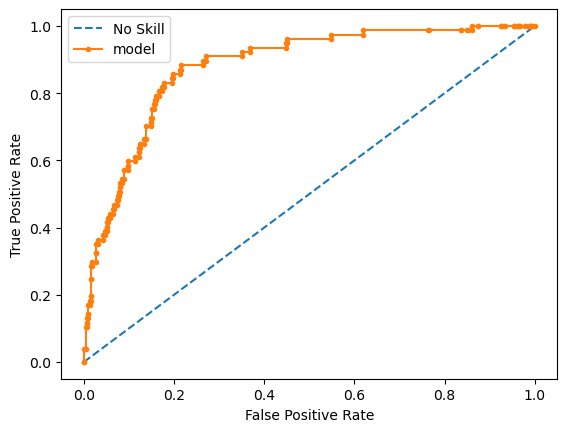

In [526]:
X_test=test[feature_columns]#test[test.symbol==symbol][feature_columns]
y_test=test['label']#test[test.symbol==symbol]['label']

ns_probs = [0 for _ in range(X_test.shape[0])]
# fit a model

# predict probabilities
model_probs = clf.predict_proba(X_test)[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
model_auc = roc_auc_score(y_test, model_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Model: ROC AUC=%.3f' % (model_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
model_fpr, model_tpr, _ = roc_curve(y_test, model_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(model_fpr, model_tpr, marker='.', label='model')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [527]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [528]:
test_scores=pd.concat([pd.Series(model_probs,index=X_test.index),X_test['symbol']],axis=1).rename(columns={0:'score'})

In [529]:
test.symbol.unique()

['AAPL', 'GOOGL', 'MSFT', 'NVDA']
Categories (4, object): ['AAPL', 'GOOGL', 'MSFT', 'NVDA']

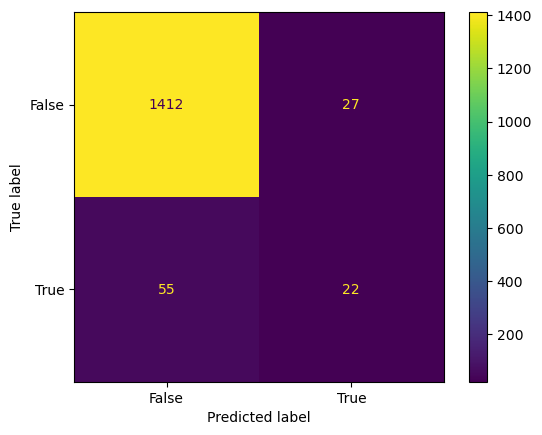

In [533]:
cm = confusion_matrix(y_test, test_scores.score>0.3, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

In [ ]:
# ROC history: iteration 1: ROC AUC=0.809
